# **Como podemos implantar a força policial de Chicago para combater o crime de forma eficiente?**
 "Crimes 2017", January 9, 2017, Chicago Data Portal, licensed under the City of Chicago Terms of Use, https://data.cityofchicago.org/Public-Safety/Crimes-2017/d62x-nvdr
 

In [6]:
pip install geopandas

In [7]:
import pandas              as pd # The gold standard of Python data analysis, to create and manipulate tables of data
import numpy               as np # The Python module for processing arrays which/Pandas is based on
import matplotlib.pyplot   as plt # The gold standard of Python data visualization, but can be complex to use
import seaborn             as sns; sns.set() # A package to make Matplotlib visualizations more aesthetic
import branca
import geopandas

import folium # package for making maps, please make sure to use a version older than 1.0.0.
from wordcloud import WordCloud # A package that will allow us to make a wordcloud
from scipy.stats import ttest_ind # A module for Python machine learning--we'll stick to T-Tests here
from IPython.display import display
from folium.plugins import HeatMap
from folium.plugins import TimeSliderChoropleth
# from time_slider_choropleth import TimeSliderChoropleth
plt.rcParams["figure.figsize"] = (8,5)

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Especializacao /Regressao/Trabalho 2/Chicago_crime_data.csv', dtype={'ID': object, 'beat_num': object})
print(df.shape)
df

(268303, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,beat_num,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,1723,17.0,33.0,14,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,1935,19.0,43.0,7,08B,1175293.0,1916610.0,2017,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)"
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,1833,18.0,42.0,8,6,1177508.0,1905401.0,2017,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,1235,12.0,25.0,31,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,522,5.0,34.0,53,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268298,11035993,JA367627,1/1/17 0:00,026XX W COYLE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2411,24.0,50.0,2,20,1157570.0,1946019.0,2017,2/10/18 15:50,42.007638,-87.695614,"(42.007638503, -87.695613598)"
268299,10942975,JA261045,1/1/17 0:00,035XX S GILES AVE,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,"SCHOOL, PUBLIC, BUILDING",True,False,212,2.0,2.0,35,2,1178842.0,1881615.0,2017,2/10/18 15:50,41.830450,-87.619323,"(41.830450306, -87.61932306)"
268300,10942796,JA260938,1/1/17 0:00,028XX N WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,OTHER,False,False,1432,14.0,1.0,21,26,1159863.0,1918955.0,2017,2/10/18 15:50,41.933326,-87.687927,"(41.933326413, -87.687927299)"
268301,10801141,JA100083,1/1/17 0:00,011XX W DICKENS AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1811,18.0,43.0,7,08B,1168452.0,1914119.0,2017,2/14/17 15:49,41.919874,-87.656504,"(41.919874416, -87.656503702)"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268303 entries, 0 to 268302
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    268303 non-null  object 
 1   Case Number           268303 non-null  object 
 2   Date                  268303 non-null  object 
 3   Block                 268303 non-null  object 
 4   IUCR                  268303 non-null  object 
 5   Primary Type          268303 non-null  object 
 6   Description           268303 non-null  object 
 7   Location Description  267178 non-null  object 
 8   Arrest                268303 non-null  bool   
 9   Domestic              268303 non-null  bool   
 10  beat_num              268303 non-null  object 
 11  District              268302 non-null  float64
 12  Ward                  268302 non-null  float64
 13  Community Area        268303 non-null  int64  
 14  FBI Code              268303 non-null  object 
 15  

In [10]:
df.describe()

,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,268302.000000,268302.000000,268303.000000,2.649250e+05,2.649250e+05,268303.0,264925.000000,264925.000000
mean,11.225522,23.275838,36.548063,1.164944e+06,1.886627e+06,2017.0,41.844494,-87.670215
std,6.988360,14.146020,21.404382,1.611747e+04,3.126913e+04,0.0,0.085990,0.058676
min,1.000000,1.000000,0.000000,1.094231e+06,1.813909e+06,2017.0,41.644606,-87.928909
25%,6.000000,10.000000,23.000000,1.153373e+06,1.859403e+06,2017.0,41.769584,-87.712284
50%,10.000000,24.000000,32.000000,1.166686e+06,1.894132e+06,2017.0,41.865297,-87.664006
75%,17.000000,35.000000,53.000000,1.176502e+06,1.909086e+06,2017.0,41.906363,-87.627760
max,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2017.0,42.022671,-87.524529


In [11]:
# REMOÇÃO DE DADOS DUPLICADOS
df=df.drop_duplicates()
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,beat_num,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,1723,17.0,33.0,14,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,1935,19.0,43.0,7,08B,1175293.0,1916610.0,2017,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)"
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,1833,18.0,42.0,8,6,1177508.0,1905401.0,2017,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,1235,12.0,25.0,31,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,522,5.0,34.0,53,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268298,11035993,JA367627,1/1/17 0:00,026XX W COYLE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2411,24.0,50.0,2,20,1157570.0,1946019.0,2017,2/10/18 15:50,42.007638,-87.695614,"(42.007638503, -87.695613598)"
268299,10942975,JA261045,1/1/17 0:00,035XX S GILES AVE,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,"SCHOOL, PUBLIC, BUILDING",True,False,212,2.0,2.0,35,2,1178842.0,1881615.0,2017,2/10/18 15:50,41.830450,-87.619323,"(41.830450306, -87.61932306)"
268300,10942796,JA260938,1/1/17 0:00,028XX N WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,OTHER,False,False,1432,14.0,1.0,21,26,1159863.0,1918955.0,2017,2/10/18 15:50,41.933326,-87.687927,"(41.933326413, -87.687927299)"
268301,10801141,JA100083,1/1/17 0:00,011XX W DICKENS AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1811,18.0,43.0,7,08B,1168452.0,1914119.0,2017,2/14/17 15:49,41.919874,-87.656504,"(41.919874416, -87.656503702)"


In [12]:
# CONTAR O NÚMERO DE "NaN" EM CADA COLUNA
print(df.isnull().sum())

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1125
Arrest                     0
Domestic                   0
beat_num                   0
District                   1
Ward                       1
Community Area             0
FBI Code                   0
X Coordinate            3378
Y Coordinate            3378
Year                       0
Updated On                 0
Latitude                3378
Longitude               3378
Location                3378
dtype: int64


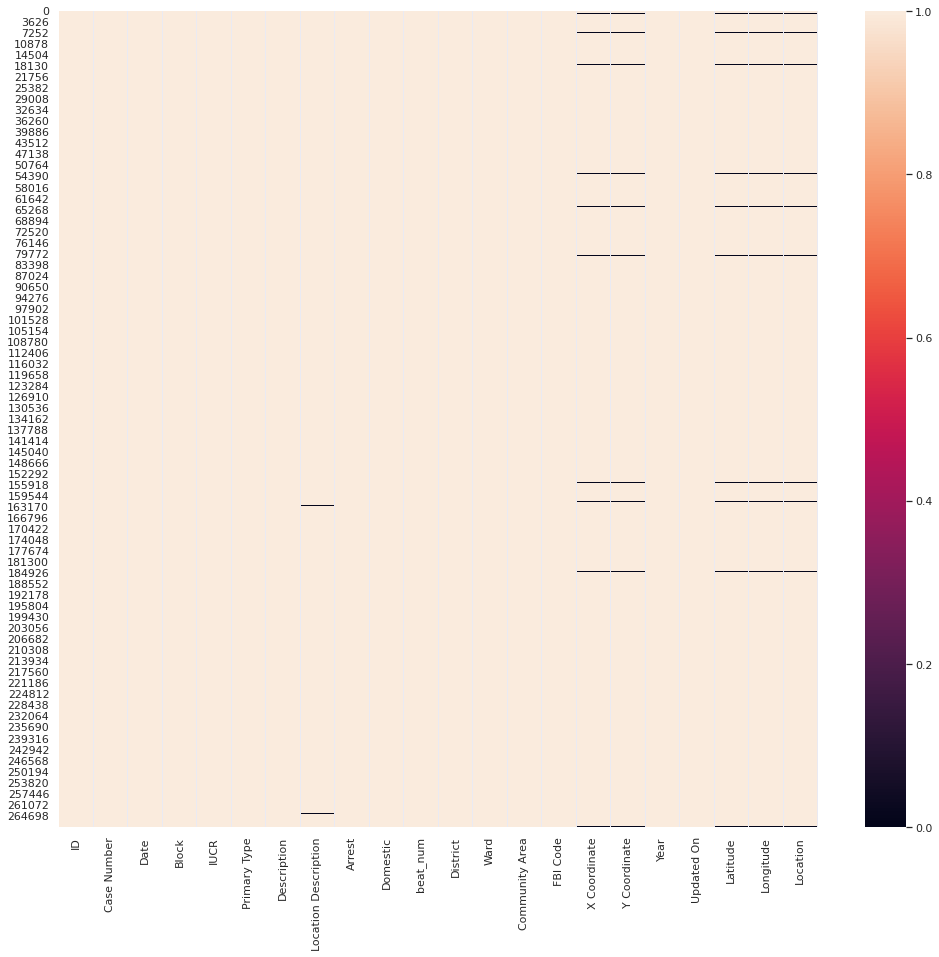

In [13]:
# Verficacao de valores null
f, ax = plt.subplots(figsize=(17, 15))
ax = sns.heatmap(df.notna())

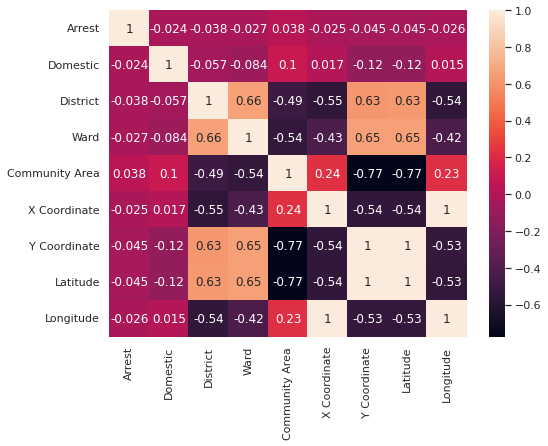

In [14]:
# Correlação Pearson
df =df.drop(columns=['Year'])
corr_df = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [15]:
#Tipos de crimenes
df["Primary Type"].value_counts()

THEFT                                64356
BATTERY                              49218
CRIMINAL DAMAGE                      29043
ASSAULT                              19304
DECEPTIVE PRACTICE                   19204
OTHER OFFENSE                        17235
BURGLARY                             13000
ROBBERY                              11879
NARCOTICS                            11659
MOTOR VEHICLE THEFT                  11385
CRIMINAL TRESPASS                     6815
WEAPONS VIOLATION                     4686
OFFENSE INVOLVING CHILDREN            2282
CRIM SEXUAL ASSAULT                   1631
PUBLIC PEACE VIOLATION                1498
INTERFERENCE WITH PUBLIC OFFICER      1087
SEX OFFENSE                           1031
PROSTITUTION                           735
HOMICIDE                               675
ARSON                                  444
LIQUOR LAW VIOLATION                   191
GAMBLING                               191
STALKING                               190
KIDNAPPING 

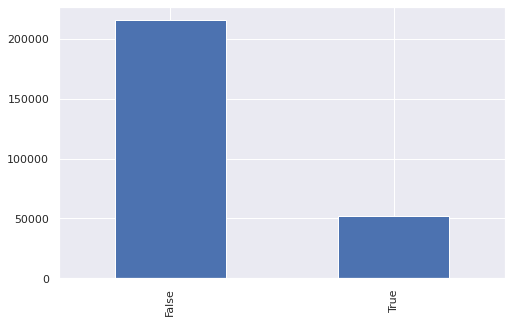

In [16]:
#Tipos de arrresto
plot_municipios = df["Arrest"].value_counts()
plot_municipios.plot.bar() 

In [17]:
# Quantidades de arrestos
df["Arrest"].value_counts()

False    215876
True      52427
Name: Arrest, dtype: int64

In [18]:
df["Domestic"].value_counts()

False    225619
True      42684
Name: Domestic, dtype: int64

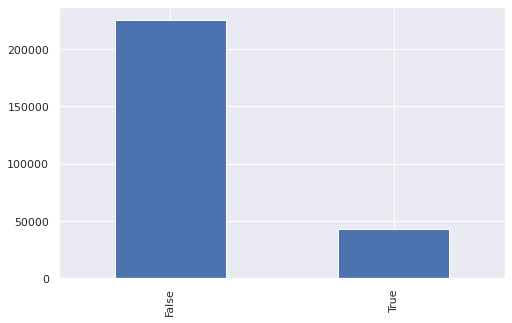

In [19]:
#Quantidade crimenes domesticos
plot_municipios = df["Domestic"].value_counts()
plot_municipios.plot.bar() 

In [20]:
df["Description"].value_counts()

SIMPLE                                      29081
$500 AND UNDER                              24516
DOMESTIC BATTERY SIMPLE                     23819
OVER $500                                   15352
TO VEHICLE                                  14547
                                            ...  
DEFACE IDENT MARKS OF FIREARM                   1
AGG PRO.EMP: OTHER FIREARM                      1
CAB OPERATION                                   1
INTIMIDATION OF LAW ENFORCEMENT OFFICIAL        1
INTERFERE W/ HIGHER EDUCATION                   1
Name: Description, Length: 310, dtype: int64

In [21]:
# Tranformaco de tempo e datetime e novas variaveis de mes e ano
df['Hour']=pd.to_datetime(df['Date']).dt.hour
#df['minute']=pd.to_datetime(df['Date']).dt.minute
df['Date']=pd.to_datetime(df['Date']).dt.date
df['days']=pd.to_datetime(df['Date']).dt.day 
df['month']=pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,beat_num,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,Hour,days,month,Year
0,11192233,JB100016,2017-12-31,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,1723,17.0,33.0,14,5,1152214.0,1930694.0,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)",23,31,12,2017
1,11196379,JB105867,2017-12-31,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,1935,19.0,43.0,7,08B,1175293.0,1916610.0,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)",23,31,12,2017
2,11192540,JB100551,2017-12-31,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,1833,18.0,42.0,8,6,1177508.0,1905401.0,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)",23,31,12,2017
3,11192239,JB100032,2017-12-31,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,1235,12.0,25.0,31,14,1173432.0,1891037.0,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)",23,31,12,2017
4,11192254,JB100003,2017-12-31,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,522,5.0,34.0,53,04B,1178329.0,1828012.0,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)",23,31,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268298,11035993,JA367627,2017-01-01,026XX W COYLE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2411,24.0,50.0,2,20,1157570.0,1946019.0,2/10/18 15:50,42.007638,-87.695614,"(42.007638503, -87.695613598)",0,1,1,2017
268299,10942975,JA261045,2017-01-01,035XX S GILES AVE,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,"SCHOOL, PUBLIC, BUILDING",True,False,212,2.0,2.0,35,2,1178842.0,1881615.0,2/10/18 15:50,41.830450,-87.619323,"(41.830450306, -87.61932306)",0,1,1,2017
268300,10942796,JA260938,2017-01-01,028XX N WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,OTHER,False,False,1432,14.0,1.0,21,26,1159863.0,1918955.0,2/10/18 15:50,41.933326,-87.687927,"(41.933326413, -87.687927299)",0,1,1,2017
268301,10801141,JA100083,2017-01-01,011XX W DICKENS AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1811,18.0,43.0,7,08B,1168452.0,1914119.0,2/14/17 15:49,41.919874,-87.656504,"(41.919874416, -87.656503702)",0,1,1,2017


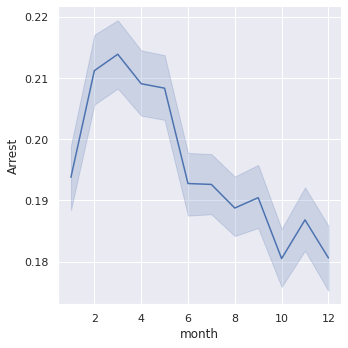

In [22]:
sns.relplot(x = "month", y = "Arrest", data = df, kind = "line");

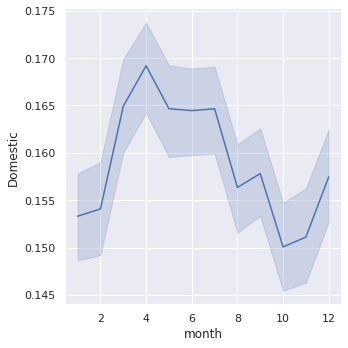

In [23]:
sns.relplot(x = "month", y = "Domestic", data = df, kind = "line");

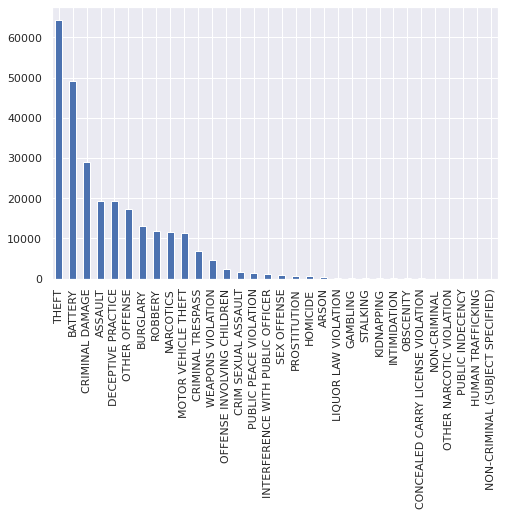

In [24]:
plot_municipios = df["Primary Type"].value_counts()
plot_municipios.plot.bar() 

In [25]:
df["Location Description"].value_counts()

STREET              59975
RESIDENCE           45880
APARTMENT           33448
SIDEWALK            21006
OTHER               11327
                    ...  
VESTIBULE               1
BASEMENT                1
CTA "L" PLATFORM        1
ROOMING HOUSE           1
CLUB                    1
Name: Location Description, Length: 128, dtype: int64

In [26]:
# nuvem de palavras para o tipo primário definido por classificação
def wordcloud_crime( df, rank ):
    df_filter = df[df["Primary Type"]==df["Primary Type"].value_counts().index[rank]]
    text = ' '.join(df_filter['Description'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Crime type:  THEFT


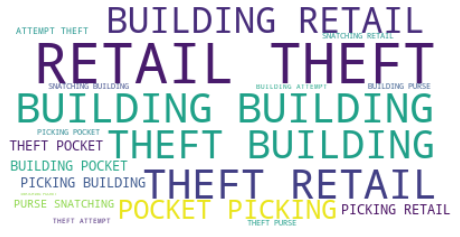

In [27]:
print("Crime type: ", df["Primary Type"].value_counts().index[0])
wordcloud_crime( df, 0 )

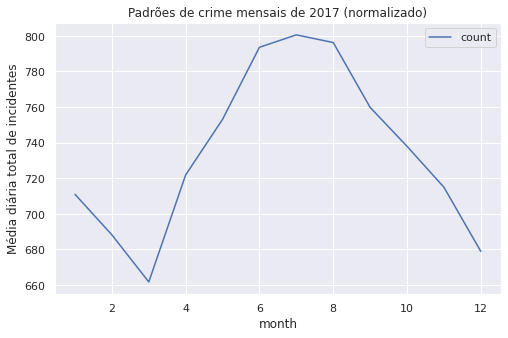

In [28]:
res = df.groupby(["month"])["ID"].count().reset_index(name="count")
res["count"] = res["count"]/[31,28,31,30,31,30,31,31,30,31,30,31]
_ = res.plot(x = "month", y = "count", title = "Padrões de crime mensais de 2017 (normalizado)")
_ = plt.ylabel("Média diária total de incidentes")

In [29]:
# formate a variável de batida para ter zeros à esquerda, contagem por batida
df["beat_num"] = df["beat_num"].str.zfill(4)
beat_cn = df.groupby("beat_num")["ID"].count().reset_index(name="crime_count")

# esquema de cores
min_cn, max_cn = beat_cn['crime_count'].quantile([0.01,0.99]).apply(round, 2)

colormap = branca.colormap.LinearColormap(
    colors=['white','yellow','orange','red','darkred'],
    #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),b
    vmin=min_cn,
    vmax=max_cn
)

colormap.caption="Total de crimes cometidos em Chicago"

In [30]:
# carregue o arquivo de forma para as batidas policiais de Chicago
beat_orig = geopandas.read_file("/content/drive/MyDrive/Especializacao /Regressao/Trabalho 2/Boundaries_beat.geojson", driver = "GeoJSON")
beat_data = beat_orig.join(beat_cn.set_index("beat_num"), how = "left", on = "beat_num")
beat_data.fillna(0, inplace = True)

In [31]:
# visualização interativa para taxa de criminalidade específica de batida em 2017

m_crime = folium.Map(location=[41.88, -87.63],
                        zoom_start=12,
                        tiles="OpenStreetMap")
style_function = lambda x: {
    'fillColor': colormap(x['properties']['crime_count']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.5
}

stategeo = folium.GeoJson(
    beat_data.to_json(),
    name='Chicago beats',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['beat_num', 'crime_count'],
        aliases=['Beat', 'Total crime'], 
        localize=True
    )
).add_to(m_crime)

colormap.add_to(m_crime)
m_crime

Output hidden; open in https://colab.research.google.com to view.

In [32]:
#Descarrega um arquivo .html para que o usuario poda ver o mapa
m_crime.save("ChicagoCrimes.html")

In [33]:
def folium_slider( beat_cn, beat_orig, tmp_drange, index_var, index_lab, 
                   value_var = "crime_count", caption = "Crimes in Chicago" ):
    #obter barra de cores
    min_cn, max_cn = beat_cn[value_var].quantile([0.01,0.99]).apply(round, 2)
    colormap = branca.colormap.LinearColormap(
        colors=['white','yellow','orange','red','darkred'],
        #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),
        vmin=min_cn,
        vmax=max_cn
    )
    colormap.caption=caption
    
     # obter dados de estilo para folium
    styledata = {}

    for beat in range(beat_orig.shape[0]):
        res_beat = beat_cn[beat_cn.beat_num==beat_orig.iloc[beat,:].beat_num]
        # preencha o valor ausente em zero: nenhum crime registrado naquele mês
        c_count = res_beat.set_index(index_var)[value_var].reindex(tmp_drange).fillna(0)
        df_tmp = pd.DataFrame(
            {'color': [colormap(count) for count in c_count], 'opacity':0.5},
            index = index_lab
        )
        styledata[str(beat)] = df_tmp
    
    styledict = {
        str(beat): data.to_dict(orient='index') for
        beat, data in styledata.items()
    }
    
    # mapa do gráfico e time slider
    m = folium.Map(location=[41.88, -87.63],
                        zoom_start=12,
                        tiles="OpenStreetMap")

    g = TimeSliderChoropleth(
        beat_orig.to_json(),
        styledict=styledict
    ).add_to(m)

    folium.GeoJson(beat_orig.to_json(), style_function = lambda x: {
        'color': 'black',
        'weight':2,
        'fillOpacity':0
    }, tooltip=folium.GeoJsonTooltip(
            fields=['beat_num'],
            aliases=['Beat'], 
            localize=True
        )).add_to(m)

    colormap.add_to(m)
    
    return m

In [34]:
# ciclo no ano 2017 
beat_cn_month = df.groupby(["beat_num","month"])["ID"].count().reset_index(name = "crime_count")
nd = pd.DataFrame({"month":range(1,13), "days":[31,28,31,30,31,30,31,31,30,31,30,31]})
beat_cn_month = beat_cn_month.merge(nd, how = "left", on = "month")
beat_cn_month["crime_count"] = beat_cn_month["crime_count"]/beat_cn_month["days"]
folium_slider( beat_cn_month, beat_orig, list(range(1,13)), "month",
               list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m")),
               caption = "Average daily total incidents in a month")

Output hidden; open in https://colab.research.google.com to view.

In [35]:
# A função zip cria uma lista de tuplas de duas listas
# O primeiro elemento de cada tupla é o tipo de crime da primeira lista, e o segundo elemento é o número da gravidade

severity_10 = zip(['CRIM_SEXUAL_ASSAULT', 'ARSON', 'HOMICIDE'], [10] * 4)
severity_9 = zip(['BATTERY', 'ASSAULT','ROBBERY', 'BURGLARY'], [9] * 4)
severity_8 = zip(['MOTOR VEHICLE THEFT', 'PUBLIC PEACE VIOLATION',  'CRIMINAL DAMAGE'], [8] * 3)
severity_7 = zip(['CRIMINAL TRESPASS', 'OFFENSE INVOLVING CHILDREN', 'KIDNAPPING'], [7] * 3)
severity_6 = zip(['STALKING', 'PUBLIC INDECENCY'], [6] * 2)
severity_5 = zip(['OTHER OFFENSE', 'HUMAN TRAFFICKING'], [5] * 2)
severity_4 = zip(['DECEPTIVE PRACTICE', 'INTIMIDATION'], [4] * 2)
severity_3 = zip(['INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE'], [3] * 2)
severity_2 = zip(['NARCOTICS', 'WEAPONS VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION','OBSCENITY'], [2] * 4)
severity_1 = zip(['THEFT','GAMBLING', 'PROSTITUTION', 'LIQUOR LAW VIOLATION', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL'], [1] * 5)

# By turning these zipped tuples into a dictionary, we can map each row of the dataset to its severity label
severities = dict()
for s in [severity_1, severity_2, severity_3, severity_4, severity_5, severity_6, severity_7, severity_8, severity_9, severity_10]:
    severities.update(dict(s))

# Our last step is mapping primary_type using this dictionary
df['severity_bus'] = df['Primary Type'].apply(severities.get)

In [36]:
# note that we still need to do normalization by days
beat_cs_month = df.groupby(["beat_num","month"]).aggregate({"severity_bus":lambda x: sum(x)}).reset_index()
nd = pd.DataFrame({"month":range(1,13), "days":[31,28,31,30,31,30,31,31,30,31,30,31]})
beat_cs_month = beat_cs_month.merge(nd, how = "left", on = "month")
beat_cs_month["severity_bus_tot"] = beat_cs_month["severity_bus"]/beat_cs_month["days"]
beat_cs_month["severity_bus_avg"] = beat_cs_month["severity_bus_tot"]/beat_cn_month["crime_count"]
folium_slider( beat_cs_month, beat_orig, list(range(1,13)), "month",
              list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m")),
              value_var = "severity_bus_avg", caption = "Average crime severity in Chicago")

Output hidden; open in https://colab.research.google.com to view.

In [37]:
# SUPRIMIR COLUNAS
df2 =df.drop(columns=['ID', 'Case Number' , 'Date'	, 'Block' ,'IUCR',	'Description',	'Location Description',	
                    	'beat_num',	'District',	'Ward',	'Community Area',	
                      'FBI Code',	'X Coordinate',	'Y Coordinate',	'Updated On',	'Latitude',	'Longitude',	'Location', 'days', 
                      'month',	'Year'])

In [38]:
df2

,Primary Type,Arrest,Domestic,Hour,severity_bus
0,BURGLARY,False,False,23,9.0
1,BATTERY,False,False,23,9.0
2,THEFT,False,False,23,1.0
3,CRIMINAL DAMAGE,False,True,23,8.0
4,BATTERY,False,True,23,9.0
...,...,...,...,...,...
268298,OFFENSE INVOLVING CHILDREN,False,False,0,7.0
268299,CRIM SEXUAL ASSAULT,True,False,0,NaN
268300,CRIMINAL TRESPASS,False,False,0,7.0
268301,BATTERY,False,True,0,9.0


In [39]:
df3= pd.get_dummies(df2, columns=['Primary Type','Domestic'])
df3

,Arrest,Hour,severity_bus,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CONCEALED CARRY LICENSE VIOLATION,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_HUMAN TRAFFICKING,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_NON-CRIMINAL,Primary Type_NON-CRIMINAL (SUBJECT SPECIFIED),Primary Type_OBSCENITY,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_OTHER NARCOTIC VIOLATION,Primary Type_OTHER OFFENSE,Primary Type_PROSTITUTION,Primary Type_PUBLIC INDECENCY,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,Domestic_False,Domestic_True
0,False,23,9.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,23,9.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,False,23,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,False,23,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,False,23,9.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268298,False,0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
268299,True,0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
268300,False,0,7.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
268301,False,0,9.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
# Se escolhe as tres primeiros casos de crimes no Chicago: THEFT, BATTERY, CRIMINAL DAMAGE     
df4 =df3.drop(columns=['Primary Type_ARSON',	'Primary Type_ASSAULT'	,'Primary Type_BURGLARY',
                         'Primary Type_CONCEALED CARRY LICENSE VIOLATION',	'Primary Type_CRIM SEXUAL ASSAULT',	
                         'Primary Type_CRIMINAL TRESPASS',	'Primary Type_DECEPTIVE PRACTICE',	'Primary Type_GAMBLING',
                         'Primary Type_HOMICIDE',	'Primary Type_HUMAN TRAFFICKING',	'Primary Type_INTERFERENCE WITH PUBLIC OFFICER',
                         'Primary Type_INTIMIDATION',	'Primary Type_KIDNAPPING',	'Primary Type_LIQUOR LAW VIOLATION',
                         'Primary Type_MOTOR VEHICLE THEFT',	'Primary Type_NARCOTICS',	'Primary Type_NON-CRIMINAL',
                         'Primary Type_NON-CRIMINAL (SUBJECT SPECIFIED)',	'Primary Type_OBSCENITY',	
                         'Primary Type_OFFENSE INVOLVING CHILDREN',	'Primary Type_OTHER NARCOTIC VIOLATION',
                         'Primary Type_OTHER OFFENSE',	'Primary Type_PROSTITUTION',	'Primary Type_PUBLIC INDECENCY',
                         'Primary Type_PUBLIC PEACE VIOLATION',	'Primary Type_ROBBERY',
                         'Primary Type_SEX OFFENSE',	'Primary Type_STALKING',	'Primary Type_WEAPONS VIOLATION'])
df4

,Arrest,Hour,severity_bus,Primary Type_BATTERY,Primary Type_CRIMINAL DAMAGE,Primary Type_THEFT,Domestic_False,Domestic_True
0,False,23,9.0,0,0,0,1,0
1,False,23,9.0,1,0,0,1,0
2,False,23,1.0,0,0,1,1,0
3,False,23,8.0,0,1,0,0,1
4,False,23,9.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
268298,False,0,7.0,0,0,0,1,0
268299,True,0,NaN,0,0,0,1,0
268300,False,0,7.0,0,0,0,1,0
268301,False,0,9.0,1,0,0,0,1


In [41]:
df4.dtypes

Arrest                             bool
Hour                              int64
severity_bus                    float64
Primary Type_BATTERY              uint8
Primary Type_CRIMINAL DAMAGE      uint8
Primary Type_THEFT                uint8
Domestic_False                    uint8
Domestic_True                     uint8
dtype: object

In [42]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,beat_num,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,Hour,days,month,Year,severity_bus
0,11192233,JB100016,2017-12-31,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,1723,17.0,33.0,14,5,1152214.0,1930694.0,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)",23,31,12,2017,9.0
1,11196379,JB105867,2017-12-31,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,1935,19.0,43.0,7,08B,1175293.0,1916610.0,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)",23,31,12,2017,9.0
2,11192540,JB100551,2017-12-31,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,1833,18.0,42.0,8,6,1177508.0,1905401.0,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)",23,31,12,2017,1.0
3,11192239,JB100032,2017-12-31,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,1235,12.0,25.0,31,14,1173432.0,1891037.0,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)",23,31,12,2017,8.0
4,11192254,JB100003,2017-12-31,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,0522,5.0,34.0,53,04B,1178329.0,1828012.0,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)",23,31,12,2017,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268298,11035993,JA367627,2017-01-01,026XX W COYLE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2411,24.0,50.0,2,20,1157570.0,1946019.0,2/10/18 15:50,42.007638,-87.695614,"(42.007638503, -87.695613598)",0,1,1,2017,7.0
268299,10942975,JA261045,2017-01-01,035XX S GILES AVE,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,"SCHOOL, PUBLIC, BUILDING",True,False,0212,2.0,2.0,35,2,1178842.0,1881615.0,2/10/18 15:50,41.830450,-87.619323,"(41.830450306, -87.61932306)",0,1,1,2017,NaN
268300,10942796,JA260938,2017-01-01,028XX N WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,OTHER,False,False,1432,14.0,1.0,21,26,1159863.0,1918955.0,2/10/18 15:50,41.933326,-87.687927,"(41.933326413, -87.687927299)",0,1,1,2017,7.0
268301,10801141,JA100083,2017-01-01,011XX W DICKENS AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1811,18.0,43.0,7,08B,1168452.0,1914119.0,2/14/17 15:49,41.919874,-87.656504,"(41.919874416, -87.656503702)",0,1,1,2017,9.0


In [43]:
df4.to_csv("dados.csv")

In [44]:
# GERAÇÃO DAS AMOSTRAS ALEATÓRIAS DE TREINO E TESTE
from sklearn.model_selection import train_test_split
train, test = train_test_split(df4, test_size=0.2)

In [45]:
train.shape

(214642, 8)

In [46]:
test.shape

(53661, 8)

In [47]:
# CRIAÇÃO DO df_train e df_test - amostra de treino e teste
train.to_csv('df_train.csv', index=False, encoding='utf-8')
test.to_csv('df_test.csv', index=False, encoding='utf-8')

In [48]:
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,beat_num,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,Hour,days,month,Year,severity_bus
0,11192233,JB100016,2017-12-31,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,1723,17.0,33.0,14,5,1152214.0,1930694.0,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)",23,31,12,2017,9.0
1,11196379,JB105867,2017-12-31,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,1935,19.0,43.0,7,08B,1175293.0,1916610.0,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)",23,31,12,2017,9.0
2,11192540,JB100551,2017-12-31,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,1833,18.0,42.0,8,6,1177508.0,1905401.0,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)",23,31,12,2017,1.0
3,11192239,JB100032,2017-12-31,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,1235,12.0,25.0,31,14,1173432.0,1891037.0,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)",23,31,12,2017,8.0
4,11192254,JB100003,2017-12-31,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,0522,5.0,34.0,53,04B,1178329.0,1828012.0,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)",23,31,12,2017,9.0


In [49]:
#NOVOS CODIGOS PREDITORIOS
# SUPRIMIR COLUNAS SEM TIRAR O MES E x e y coordenadas
df5 =df.drop(columns=['ID', 'Case Number' , 'Date'	, 'Block' ,'IUCR',	'Description',	'Location Description',	
                    	'beat_num',	'District',	'Ward',	'Community Area',	
                      'FBI Code',	'Updated On',	'Latitude',	'Longitude',	'Location', 'days',	'Year'])

In [50]:
df5

,Primary Type,Arrest,Domestic,X Coordinate,Y Coordinate,Hour,month,severity_bus
0,BURGLARY,False,False,1152214.0,1930694.0,23,12,9.0
1,BATTERY,False,False,1175293.0,1916610.0,23,12,9.0
2,THEFT,False,False,1177508.0,1905401.0,23,12,1.0
3,CRIMINAL DAMAGE,False,True,1173432.0,1891037.0,23,12,8.0
4,BATTERY,False,True,1178329.0,1828012.0,23,12,9.0
...,...,...,...,...,...,...,...,...
268298,OFFENSE INVOLVING CHILDREN,False,False,1157570.0,1946019.0,0,1,7.0
268299,CRIM SEXUAL ASSAULT,True,False,1178842.0,1881615.0,0,1,NaN
268300,CRIMINAL TRESPASS,False,False,1159863.0,1918955.0,0,1,7.0
268301,BATTERY,False,True,1168452.0,1914119.0,0,1,9.0


In [51]:
df6= pd.get_dummies(df5, columns=['Primary Type','Domestic'])
df6

,Arrest,X Coordinate,Y Coordinate,Hour,month,severity_bus,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CONCEALED CARRY LICENSE VIOLATION,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_HUMAN TRAFFICKING,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_NON-CRIMINAL,Primary Type_NON-CRIMINAL (SUBJECT SPECIFIED),Primary Type_OBSCENITY,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_OTHER NARCOTIC VIOLATION,Primary Type_OTHER OFFENSE,Primary Type_PROSTITUTION,Primary Type_PUBLIC INDECENCY,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,Domestic_False,Domestic_True
0,False,1152214.0,1930694.0,23,12,9.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,1175293.0,1916610.0,23,12,9.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,False,1177508.0,1905401.0,23,12,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,False,1173432.0,1891037.0,23,12,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,False,1178329.0,1828012.0,23,12,9.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268298,False,1157570.0,1946019.0,0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
268299,True,1178842.0,1881615.0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
268300,False,1159863.0,1918955.0,0,1,7.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
268301,False,1168452.0,1914119.0,0,1,9.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [52]:
# Se escolhe as tres primeiros casos de crimes no Chicago: THEFT, BATTERY, CRIMINAL DAMAGE     
df7 =df6.drop(columns=['Primary Type_ARSON',	'Primary Type_ASSAULT'	,'Primary Type_BURGLARY',
                         'Primary Type_CONCEALED CARRY LICENSE VIOLATION',	'Primary Type_CRIM SEXUAL ASSAULT',	
                         'Primary Type_CRIMINAL TRESPASS',	'Primary Type_DECEPTIVE PRACTICE',	'Primary Type_GAMBLING',
                         'Primary Type_HOMICIDE',	'Primary Type_HUMAN TRAFFICKING',	'Primary Type_INTERFERENCE WITH PUBLIC OFFICER',
                         'Primary Type_INTIMIDATION',	'Primary Type_KIDNAPPING',	'Primary Type_LIQUOR LAW VIOLATION',
                         'Primary Type_MOTOR VEHICLE THEFT',	'Primary Type_NARCOTICS',	'Primary Type_NON-CRIMINAL',
                         'Primary Type_NON-CRIMINAL (SUBJECT SPECIFIED)',	'Primary Type_OBSCENITY',	
                         'Primary Type_OFFENSE INVOLVING CHILDREN',	'Primary Type_OTHER NARCOTIC VIOLATION',
                         'Primary Type_OTHER OFFENSE',	'Primary Type_PROSTITUTION',	'Primary Type_PUBLIC INDECENCY',
                         'Primary Type_PUBLIC PEACE VIOLATION',	'Primary Type_ROBBERY',
                         'Primary Type_SEX OFFENSE',	'Primary Type_STALKING',	'Primary Type_WEAPONS VIOLATION'])

In [53]:
df7

,Arrest,X Coordinate,Y Coordinate,Hour,month,severity_bus,Primary Type_BATTERY,Primary Type_CRIMINAL DAMAGE,Primary Type_THEFT,Domestic_False,Domestic_True
0,False,1152214.0,1930694.0,23,12,9.0,0,0,0,1,0
1,False,1175293.0,1916610.0,23,12,9.0,1,0,0,1,0
2,False,1177508.0,1905401.0,23,12,1.0,0,0,1,1,0
3,False,1173432.0,1891037.0,23,12,8.0,0,1,0,0,1
4,False,1178329.0,1828012.0,23,12,9.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
268298,False,1157570.0,1946019.0,0,1,7.0,0,0,0,1,0
268299,True,1178842.0,1881615.0,0,1,NaN,0,0,0,1,0
268300,False,1159863.0,1918955.0,0,1,7.0,0,0,0,1,0
268301,False,1168452.0,1914119.0,0,1,9.0,1,0,0,0,1


In [54]:
# GERAÇÃO DAS AMOSTRAS ALEATÓRIAS DE TREINO E TESTE
from sklearn.model_selection import train_test_split
train, test = train_test_split(df7, test_size=0.2)

In [55]:
# CRIAÇÃO DO df_train e df_test - amostra de treino e teste
train.to_csv('df_train2.csv', index=False, encoding='utf-8')
test.to_csv('df_test2.csv', index=False, encoding='utf-8')

In [56]:
%load_ext rpy2.ipython

In [57]:
%%R
install.packages("googledrive")
library("googledrive")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/googledrive_2.0.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1593656 bytes (1.5 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
%%R
dados<- read.csv(file = "/content/drive/MyDrive/Especializacao /Regressao/Trabalho 2/df_test2.csv", header = TRUE)
head(dados)
dados[1:10,]

   Arrest X.Coordinate Y.Coordinate Hour month Primary.Type_BATTERY
1   False      1142460      1908181   21     7                    1
2    True      1176209      1883394   20     5                    0
3   False      1176406      1899601    5     8                    0
4   False      1172810      1897826    0     7                    0
5   False      1176386      1838357   19     3                    1
6   False      1172970      1863110   17     5                    0
7    True      1178686      1878995   11     5                    0
8    True      1154228      1895173   12     8                    0
9   False      1173857      1903119   19    11                    0
10   True      1167865      1931102    6     6                    0
   Primary.Type_CRIMINAL.DAMAGE Primary.Type_THEFT Domestic_False Domestic_True
1                             0                  0              0             1
2                             0                  0              1             0
3           

In [60]:
%%R
# Removendo Colunas de dados que não contribuem com o modelo
dados$X <- NULL

head(dados)

  Arrest X.Coordinate Y.Coordinate Hour month Primary.Type_BATTERY
1  False      1142460      1908181   21     7                    1
2   True      1176209      1883394   20     5                    0
3  False      1176406      1899601    5     8                    0
4  False      1172810      1897826    0     7                    0
5  False      1176386      1838357   19     3                    1
6  False      1172970      1863110   17     5                    0
  Primary.Type_CRIMINAL.DAMAGE Primary.Type_THEFT Domestic_False Domestic_True
1                            0                  0              0             1
2                            0                  0              1             0
3                            0                  1              1             0
4                            0                  0              1             0
5                            0                  0              0             1
6                            0                  1        

In [61]:
%%R
## Trabalhando com a variável resposta (Arrest)
# tem 6 variaveis
table(dados[,1])


False  True 
43213 10448 


In [62]:
%%R
for (i in 1:nrow(dados)){
	if (dados[i,1]=='False') dados[i,1]<-1 else if (dados[i,1]=='True') dados[i,1]<-0}
table(dados[,1])


    0     1 
10448 43213 


In [63]:
%%R
dadosf<-dados[,c(1,2,3,4,5,6,7,8,9,10)]
str(dadosf)
dadosf$Arrest = as.numeric(as.character(dadosf$Arrest)) # apenas convertendo de char para numeric

'data.frame':	53661 obs. of  10 variables:
 $ Arrest                      : chr  "1" "0" "1" "1" ...
 $ X.Coordinate                : num  1142460 1176209 1176406 1172810 1176386 ...
 $ Y.Coordinate                : num  1908181 1883394 1899601 1897826 1838357 ...
 $ Hour                        : int  21 20 5 0 19 17 11 12 19 6 ...
 $ month                       : int  7 5 8 7 3 5 5 8 11 6 ...
 $ Primary.Type_BATTERY        : int  1 0 0 0 1 0 0 0 0 0 ...
 $ Primary.Type_CRIMINAL.DAMAGE: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Primary.Type_THEFT          : int  0 0 1 0 0 1 0 0 1 0 ...
 $ Domestic_False              : int  0 1 1 1 0 1 1 1 1 1 ...
 $ Domestic_True               : int  1 0 0 0 1 0 0 0 0 0 ...


In [64]:
%%R
# sequencia inicial para gerar o modelo:

# X_3<-model.matrix(dadosf[,2] ~ factor(dadosf[,2]))[,-1] 
# X_3[1:2,]
Y<-dadosf[,1]
head(Y)
X<-cbind(dadosf[,c(2,3,4,5,6,7,8,9,10)])
colnames(X)<-c("X.Coordinate","Y.Coordinate","Hour","month", "Primary.Type_BATTERY","Primary.Type_CRIMINAL.DAMAGE","Primary.Type_THEFT","Domestic_False","Domestic_True")
head(X)
#


  X.Coordinate Y.Coordinate Hour month Primary.Type_BATTERY
1      1142460      1908181   21     7                    1
2      1176209      1883394   20     5                    0
3      1176406      1899601    5     8                    0
4      1172810      1897826    0     7                    0
5      1176386      1838357   19     3                    1
6      1172970      1863110   17     5                    0
  Primary.Type_CRIMINAL.DAMAGE Primary.Type_THEFT Domestic_False Domestic_True
1                            0                  0              0             1
2                            0                  0              1             0
3                            0                  1              1             0
4                            0                  0              1             0
5                            0                  0              0             1
6                            0                  1              1             0


In [65]:
%%R
#### ajustando uma modelo de regressão logística
#
modlin<-glm(Y~.,data=X,family=binomial(link="logit")) #se trocar binomial por gaussian temos o modelo linear de regressão. Se escolhermos poisson temos a regressão Poisson
summary(modlin)


Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = X)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6477   0.3631   0.5203   0.7568   1.0230  

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.582e+01  1.598e+00  -9.902  < 2e-16 ***
X.Coordinate                  7.148e-06  8.316e-07   8.596  < 2e-16 ***
Y.Coordinate                  4.784e-06  4.439e-07  10.776  < 2e-16 ***
Hour                         -2.180e-02  1.772e-03 -12.304  < 2e-16 ***
month                         1.119e-02  3.332e-03   3.357 0.000788 ***
Primary.Type_BATTERY          2.545e-01  3.139e-02   8.106 5.21e-16 ***
Primary.Type_CRIMINAL.DAMAGE  1.724e+00  5.612e-02  30.725  < 2e-16 ***
Primary.Type_THEFT            1.201e+00  3.322e-02  36.150  < 2e-16 ***
Domestic_False               -3.479e-01  3.439e-02 -10.114  < 2e-16 ***
Domestic_True                        

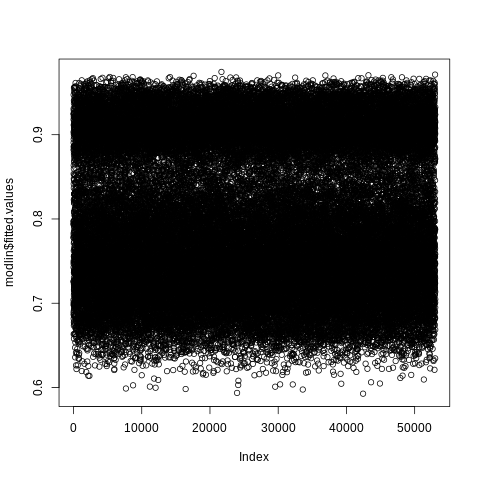

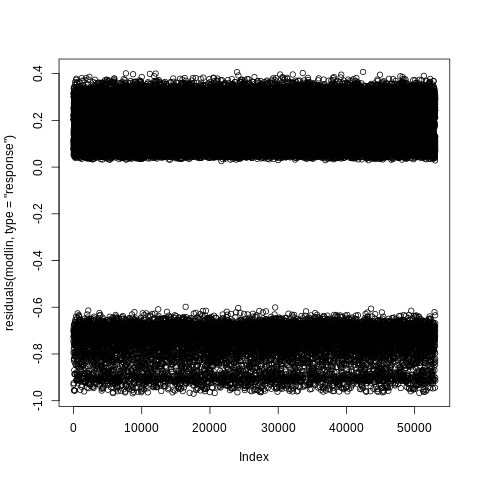

In [66]:
%%R 
# ou modlin<-glm(Y~X[,1]+X[,2]+X[,3]+X[,4]+X[,5]+X[,6],family=binomial(link="logit"))
summary(modlin)
plot(modlin$fitted.values)
plot(residuals(modlin,type='response')) # resíduos ordinários
# modlin<-glm(Y~X[,1]+X[,2]+X[,3]+X[,4]+X[,5]+X[,6]-1,family=binomial(link="logit")) # fazendo beta_0=0, no caso dele ser não significativo ou se fizer sentido prático que ele seja igual a zero
#

In [67]:
%%R
#### ajustando uma modelo de regressão logística
#
modlin<-glm(Y~.,data=X) #se trocar binomial por gaussian temos o modelo linear de regressão. Se escolhermos poisson temos a regressão Poisson

In [68]:
%%R
# resíduos ordinários
modlin<-glm(Y~X[,1]+X[,2]+X[,3]+X[,4]+X[,5]+X[,6]+X[,7]+X[,8]+X[,9]-1,family=binomial(link="logit")) # fazendo beta_0=0, no caso dele ser não significativo ou se fizer sentido prático que ele seja igual a zero

In [69]:
%%R
#### análise de diagnóstico
#
res.pear<-residuals(modlin,type='pearson')

In [70]:
%%R
# a função modlin$residuals traz os resíduos chamados de working resíduos que é a diferença entre os valores observados e o preditor linear, que não vamos usar aqui
des.res<-residuals(modlin,type='deviance') # desvio residual
#

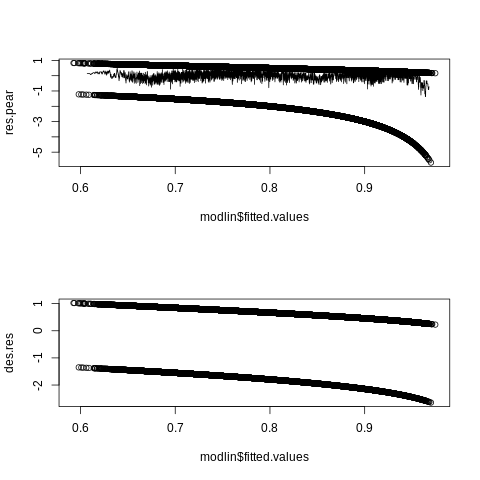

In [71]:
%%R
res_pred<-cbind(modlin$fitted.values,res.pear)
res_pred<-res_pred[order(modlin$fitted.values),]
res.med.mov<-NULL
pred.med.mov<-NULL
cont<-1
jan<-30
for (i in 1:(length(res.pear)-jan)){
	res.med.mov[cont]<-mean(res_pred[i:(i+jan),2])
	pred.med.mov[cont]<-mean(res_pred[i:(i+jan),1])	
	cont<-cont+1}
par(mfrow=c(2,1))
plot(modlin$fitted.values,res.pear)
lines(pred.med.mov,res.med.mov)
plot(modlin$fitted.values,des.res)
#

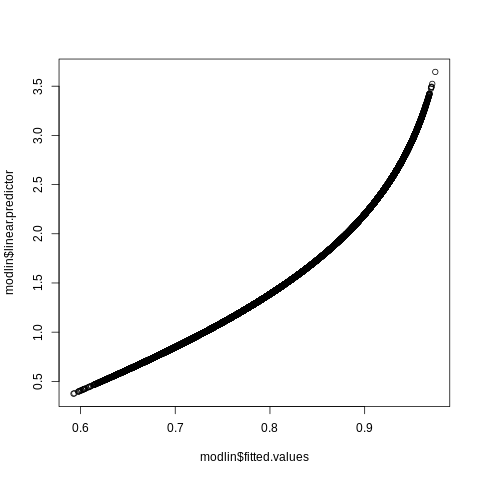

In [72]:
%%R
plot(modlin$fitted.values,modlin$linear.predictor)
#
### taxa correta de classificação
#

In [74]:
%%R
cor_clas<-NULL
pcorte<-seq(from=min(modlin$fitted.values),to=max(modlin$fitted.values),by=0.005)
for (i in 1:length(pcorte)){
	classif<-ifelse(modlin$fitted.values>pcorte[i],1,0)
	cor_clas[i]<-(table(Y,classif)[1,1]+table(Y,classif)[2,2])/nrow(X)*100}
plot(pcorte,cor_clas)
pcorte[cor_clas==max(cor_clas)]
#

R[write to console]: Error in table(Y, classif) : all arguments must have the same length




Error in table(Y, classif) : all arguments must have the same length


RInterpreterError: ignored

In [ ]:
%%R
classif<-ifelse(modlin$fitted.values>pcorte[cor_clas==max(cor_clas)],1,0)
table(classif,Y)
#

In [ ]:
%%R
# dando custo 5 para classificações erradas
err_clas<-NULL
pcorte<-seq(from=min(modlin$fitted.values),to=max(modlin$fitted.values),by=0.005)
for (i in 1:length(pcorte)){
	classif<-ifelse(modlin$fitted.values>pcorte[i],1,0)
	err_clas[i]<-(table(Y,classif)[1,2]+(1/5)*table(Y,classif)[2,1])/((1/5)*sum(Y==0)+sum(Y==1))*100}
plot(pcorte,err_clas)
pcorte[err_clas==min(err_clas)]
#

In [ ]:
%%R
classif<-ifelse(modlin$fitted.values>pcorte[err_clas==min(err_clas)],1,0)
table(classif,Y)
#

In [ ]:
%%R
##### Seleção de variáveis
#
## Usando stepwise por AIC
#
step(modlin, direction="both")
modlin<-glm(Y~X[,2]+X[,3]+X[,4]+X[,5]+X[,6]+X[,7]+X[,8]+X[,9], family=binomial(link="logit"))
summary(modlin)
#

In [ ]:
%%R
install.packages("glmnet") 

In [ ]:
%%R
## Seleção de variáveis via Lasso
#
library(glmnet)
set.seed(100)
matX<-data.matrix(X)
cv.out<-cv.glmnet(matX,Y,alpha=1,nfolds=5,family="binomial") #alpha=1 representa o lasso, alpha=0 representa o ridge e alpha entre 0 e 1 representa o elasticnet
plot(cv.out)
bestlam<-cv.out$lambda.min
modlasso<-glmnet(matX,Y,alpha=1,lambda=bestlam,family="binomial")
coef(modlasso)

In [ ]:
%%R
## Seleção de variáveis via Ridge
#
set.seed(100)
cv.out<-cv.glmnet(matX,Y,alpha=0,nfolds=5,family="binomial") #alpha=1 representa o lasso, alpha=0 representa o ridge e alpha entre 0 e 1 representa o elasticnet
plot(cv.out)
bestlam<-cv.out$lambda.min
modridge<-glmnet(matX,Y,alpha=0,lambda=bestlam,family="binomial")
coef(modridge)
#